  Gradient will be taken with respect to all layers! 
thickL1:  5.284521005201405e-07
thickL2:  7.602923357738591e-07
thickH1:  3.733648095151694e-07
thickH2:  5.311796118517261e-07
  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 
347.5235122839017  photons / s / m^2 transmitted
472.21589043999995  photons / s / m^2 total from Sun
73.594201152377 % transmissive
  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 


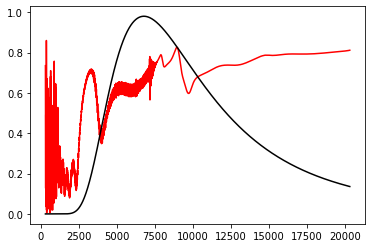

362.5076860112134  photons / s / m^2 blocked
525.6811452471953  photons / s / m^2 total from BB radiation
68.9596135012125 % BB blocked
364.81556717056185  photons / s / m^2 blocked
69.39864031056538 % BB trapped
5.3809553070477545  photons / s / m^2 above exciton biding energy transmitted
7.741837480583207  photons / s / m^2 total above exciton binding energy from BB radiation
69.50488589489736 % above binding energy transmitted
{'Material_List': ['Air', 'SiO2', 'Al', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'PS', 'SiO2', 'Al', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Air'], 'Thickness_List': [0, 2.6422605026007024e-07, 1.5e-09, 2.6422605026007024e-07, 3.733648095151694e-07, 5.284521005201405e-07, 3.733648095151694e-07, 5.284521005201405e-07, 3.733648095151694e-07, 0.0001, 0.001, 3.8014616788692957e-07, 1.5e-09, 3.8014616788692957e-07, 5.311796118517261e-07, 7.602923357738591e-07, 5.311796118517261e-07, 7.602923357738591e-07, 5.311796118517261e-07,

In [14]:

from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
from wptherml.numlib import numlib
from scipy.optimize import minimize
import time
import numpy as np
h = 6.626e-34
c = 299792458.
temp = 428
wl1 = 3000e-9
wl2 = 4200e-9

### define Lamba_List bounds
startwl = 300e-9
endwl = 20300e-9
numwl = 5001;

### create a dummy stack to get refractive indices
structure = {
        'Material_List' : ['Air', 'SiO2', 'Ta2O5', 'Air'],
        'Thickness_List': [0, 1e-7, 1e-7, 0 ],
        'Lambda_List': [startwl, endwl, numwl],
        'Temperature': temp
       }
### create multilayer
dummy = multilayer(structure)
lambdas = dummy.lambda_array

### find Lamba_List indices for wl1 and wl2
d_lamb = (endwl - startwl)/(numwl-1)
wl1i = round((wl1 - startwl)/(d_lamb))
wl2i = round((wl2 - startwl)/(d_lamb))

### get refractive index arrays
n_SiO2 = dummy.layer_ri(1)
n_Ta2O5 = dummy.layer_ri(2)

### calculate effective quarter wave lengths for given vacuum wavelengths
thickL1 = 0.25*wl1/n_SiO2[wl1i].real
thickL2 = 0.25*wl2/n_SiO2[wl2i].real
thickH1 = 0.25*wl1/n_Ta2O5[wl1i].real
thickH2 = 0.25*wl2/n_Ta2O5[wl2i].real

print("thickL1: ",thickL1)
print("thickL2: ",thickL2)
print("thickH1: ",thickH1)
print("thickH2: ",thickH2)

### create a full filter-PS-filter stack
structure = {
        'Material_List' : ['Air', 'SiO2', 'Al', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'PS', 'SiO2', 'Al', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Air'],
        'Thickness_List': [0, thickL1/2, 1.5e-9, thickL1/2, thickH1, thickL1, thickH1, thickL1, thickH1, 1e-4, 1e-3, thickL2/2, 1.5e-9, thickL2/2, thickH2, thickL2, thickH2, thickL2, thickH2, 1e-4, 0],
        'Lambda_List': [startwl, endwl, numwl],
        'Temperature': temp
       }
### create multilayer
ps = multilayer(structure)

### Just create a multilayer instance so we can have access to some
### basic quantities, including an array of wavelengths
solar_skin = multilayer(structure)

### Get the solar spectrum
AM = datalib.AM(solar_skin.lambda_array)

### Get the solar flux spectrum (number of photons per second per wavelength per meter squared)
AMflux = AM * solar_skin.lambda_array / (h * c)

### Integrate the above-gap solar flux transmitted through optic
AM_transmit = numlib.Integrate(AM * (1 - ps.reflectivity_array), solar_skin.lambda_array, startwl, 760e-9)
print(AM_transmit," photons / s / m^2 transmitted")

### Integrate the total above-gap solar flux
AM_tot = numlib.Integrate(AM, solar_skin.lambda_array, startwl, 760e-9)
print(AM_tot," photons / s / m^2 total from Sun")

print(100* AM_transmit / AM_tot,"% transmissive")

### create the bottom filter stack
structure_bottom = {
        'Material_List' : ['Air', 'SiO2', 'Al', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Air'],
        'Thickness_List': [0, thickL2/2, 1.5e-9, thickL2/2, thickH2, thickL2, thickH2, thickL2, thickH2, 1e-4, 0],
        'Lambda_List': [startwl, endwl, numwl],
        'Temperature': temp
       }

structure_top = {
        'Material_List' : ['Air', 'SiO2', 'Al', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Ta2O5', 'SiO2', 'Air'],
        'Thickness_List': [0, thickL1/2, 1.5e-9, thickL1/2, thickH1, thickL1, thickH1, thickL1, thickH1, 1e-4, 0],
        'Lambda_List': [startwl, endwl, numwl],
        'Temperature': temp
       }

### create multilayer
ps_bottom = multilayer(structure_bottom)
ps_top = multilayer(structure_top)

### Make a BB spectrum at specified temp
rho = datalib.BB(solar_skin.lambda_array, temp)

### plot reflectivity and absorptivity/emissivity of the multilayer
plt.plot(ps.lambda_array*1e9, ps.reflectivity_array, 'red')
### plt.plot(ps.lambda_array*1e9, ps.emissivity_array, 'blue')
plt.plot(ps.lambda_array*1e9, 1e-7*rho/6, 'black')
plt.show()


### Integrate the blocked BB radiation longer than 3.5 um
BB_blocked = numlib.Integrate(rho * ps_bottom.reflectivity_array, solar_skin.lambda_array, 3500e-9, endwl)
print(BB_blocked," photons / s / m^2 blocked")

### Integrate the total BB radiation longer than 3.5 um
BB_tot = numlib.Integrate(rho, solar_skin.lambda_array, 3500e-9, endwl)
print(BB_tot," photons / s / m^2 total from BB radiation")

print(100* BB_blocked / BB_tot,"% BB blocked")

### Integrate the blocked BB radiation longer than 3.5 um
BB_trapped = 0.5*numlib.Integrate(rho * ps_bottom.reflectivity_array, solar_skin.lambda_array, 3500e-9, endwl) + 0.5*numlib.Integrate(rho * ps_top.reflectivity_array, solar_skin.lambda_array, 3500e-9, endwl)
print(BB_trapped," photons / s / m^2 blocked")

print(100* BB_trapped / BB_tot,"% BB trapped")

### Integrate the transmitted BB radiation shorter than 3.5 um
EBE_transmitted = numlib.Integrate(rho * (1 - ps_bottom.reflectivity_array), solar_skin.lambda_array, 1000e-9, 3500e-9)
print(EBE_transmitted," photons / s / m^2 above exciton biding energy transmitted")

### Integrate the total BB radiation shorter than 3.5 um
EBE_tot = numlib.Integrate(rho, solar_skin.lambda_array, 1000e-9, 3500e-9)
print(EBE_tot," photons / s / m^2 total above exciton binding energy from BB radiation")

print(100* EBE_transmitted / EBE_tot,"% above binding energy transmitted")
print(structure)

In [15]:
thickL1 = 0.25*wl1/n_SiO2[wl1i].real
thickL2 = 0.25*wl2/n_SiO2[wl2i].real
thickH1 = 0.25*wl1/n_Ta2O5[wl1i].real
thickH2 = 0.25*wl2/n_Ta2O5[wl2i].real

thickL2 *= 1e9
thickH2 *= 1e9

def update_bottom(x, rho):
    for i in range(0,len(x)):
        ps_bottom.d[i+1] = x[i] * 1e-9
        solar_skin.d[i+1] = x[i] * 1e-9
    ### now we have the new structure, update fresnel quantities
    ps_bottom.fresnel()
    ### now we have new emissivity, update thermal emission
    BB_blocked = numlib.Integrate(rho * ps_bottom.reflectivity_array, ps_bottom.lambda_array, 3500e-9, 20300e-9)
    ### Integrate the total BB radiation longer than 3.5 um
    BB_tot = numlib.Integrate(rho, solar_skin.lambda_array, 3500e-9, endwl)
    print(BB_tot, "from BB radiation")
    ### return negative of luminous efficiency
    ### return negative of luminous efficiency
    return BB_blocked/BB_tot * 100

def BuildGradient(x0, rho):
    dim = len(x0)
    h0 = 0.1e-9*np.ones(dim)
    g = np.zeros(dim)
    for i in range(0,dim):
        xpass = np.copy(x0)
        fx = x0[i] + h0[i]
        bx = x0[i] - h0[i]
        xpass[i] = fx
        efx = update_bottom(xpass, rho)
        xpass[i] = bx
        ebx = update_bottom(xpass, rho)

        run = 2*h0[i]
        g[i] = (efx-ebx)/run
    return g

### Function that gets the negative of the efficiency and the 
### negative of the gradient for use in the l-bfgs-b algorithm
### also prints out the time for timing purposes!
def SuperFunc(x0):
    en = update_bottom(x0, rho)
    c_time = time.time()
    print(en,",",c_time)
    gr = BuildGradient(x0, rho)
    return en, gr



x = np.array([thickL2/2, 1.5, thickL2/2, thickH2, thickL2, thickH2, thickL2, thickH2, 1e5])

print(x)

print(update_bottom(x, rho))
#g = BuildGradient(x, rho)
#print(g)


# the bounds for L-BFGS-B updates!
bfgs_xmin = np.ones(len(x))
bfgs_xmax = 405*np.ones(len(x))

# rewrite the bounds in the way required by L-BFGS-B
bfgs_bounds = [(low, high) for low, high in zip(bfgs_xmin, bfgs_xmax)]

print(bfgs_bounds)



[3.80146168e+02 1.50000000e+00 3.80146168e+02 5.31179612e+02
 7.60292336e+02 5.31179612e+02 7.60292336e+02 5.31179612e+02
 1.00000000e+05]
525.6811452471953 from BB radiation
68.9596135012125
[(1.0, 405.0), (1.0, 405.0), (1.0, 405.0), (1.0, 405.0), (1.0, 405.0), (1.0, 405.0), (1.0, 405.0), (1.0, 405.0), (1.0, 405.0)]


In [ ]:
### initialize the solution vector xs to be the thicknesses from 
### the structure dictionary
xs = np.zeros(length)
for i in range(0,length):
    xs[i] = cc.d[i+1]*1e9

### print out initial solution vector and initial efficiency
print("xs is ")
print(xs)
print("efficiency is ",update_multilayer(xs))

### run l-bfgs-b algorithm!
ret = minimize(SuperFunc, xs, method="L-BFGS-B", jac=True, bounds=bfgs_bounds)

### print optimal solution and its efficiency!
print(ret.x)
print(update_multilayer(ret.x))

In [ ]:
### given an array of thicknesses of the AR layers, update
### the structure and compute its conversion efficiency
def update_bottom(x, rho):
    for i in range(0,len(x)):
        ps_bottom.d[i+1] = x[i]*1e-9
    ### now we have the new structure, update fresnel quantities
    ps_bottom.fresnel()
    ### now we have new emissivity, update thermal emission
    BB_blocked = numlib.Integrate(rho * ps_bottom.reflectivity_array, ps_bottom.lambda_array, 3500e-9, 20300e-9)
    ### Integrate the total BB radiation longer than 3.5 um
    BB_tot = numlib.Integrate(rho, solar_skin.lambda_array, 3500e-9, endwl)
    ### return negative of luminous efficiency
    return BB_blocked*100


### This is a finite-difference version of the gradient
### which may be called by SuperFunc if one wants to compare it
### to analytic_grad
def BuildGradient(x0):
    dim = len(x0)
    h0 = 0.1e-9*np.ones(dim)
    g = np.zeros(dim)
    for i in range(0,dim):
        xpass = np.copy(x0)
        fx = x0[i] + h0[i]
        bx = x0[i] - h0[i]
        xpass[i] = fx
        efx = update_multilayer(xpass)
        xpass[i] = bx
        ebx = update_multilayer(xpass)

        run = 2*h0[i]
        g[i] = (efx-ebx)/run
    return g

### function that gets efficiency and gradient given an array 
### of AR layer thicknesses
def SuperFunc(x):
    en = update_multilayer(x)
    gr = analytic_grad(x)
    return en, gr


### prints efficiency and time
def print_fun(x, f, accepted):
    c_time = time.time()
    print(f,",",c_time)

### called by the basin hopping algorithm to initiate new
### local optimizations
def my_take_step(x):
    xnew = np.copy(x)
    dim = len(xnew)
    for i in range(0,dim):
        rn = 50.*np.abs(np.random.randn())
        xnew[i] = rn
    return xnew

### bounds on basin hopping solutions
class MyBounds(object):
      ### note xmax and xmin need to have as many elements as there are thicknesses that are varied
    def __init__(self, xmax=49.01*np.ones(length), xmin=0.01*np.ones(length)):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

# the bounds for L-BFGS-B updates!
bfgs_xmin = 0.01*np.ones(length)
bfgs_xmax = 49.01*np.ones(length)

# rewrite the bounds in the way required by L-BFGS-B
bfgs_bounds = [(low, high) for low, high in zip(bfgs_xmin, bfgs_xmax)]

### arguments for basin hopping algorithm
minimizer_kwargs = {"method": "L-BFGS-B", "jac": True, "bounds": bfgs_bounds}
mybounds = MyBounds()

### initial guess for AR layer thicknesses!
xs = np.ones(length)*20.

### call basin hopping!
ret = basinhopping(SuperFunc, xs, minimizer_kwargs=minimizer_kwargs, niter=100, take_step=my_take_step, callback=print_fun, accept_test=mybounds)

### print optimimal result!
print(ret.x)
print(update_multilayer(ret.x))
 